In [1]:
from eblr import EBLR
import pandas as pd
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('data.csv', index_col=0)

In [3]:
X = df[['dow','promo','date']].to_numpy()
y = df[['sales']].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=14)

In [4]:
eblr = EBLR()
eblr.fit(X_train, y_train)

y_pred = eblr.predict(X_test)
y_intervals = eblr.predict_intervals(X_test)

R[write to console]: Loading required package: cluster




 node number: 4 
   root
   1>=4.5
   2>=0.5

 node number: 4 
   root
   1>=4.5
   2< 0.5

 node number: 4 
   root
   2>=0.5
   1< 4.5

 node number: 1 
   root


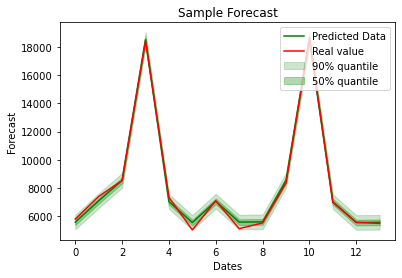

In [5]:
fig, ax = plt.subplots(1)
line = np.linspace(0, len(y_test)-1, len(y_test)).reshape(-1)

ax.plot(y_pred, color='g', label='Predicted Data')
ax.plot(y_test, color='r', label='Real value')

ax.fill_between(line,
                y_intervals[0],
                y_intervals[4],
                color='g',
                alpha=.2,
                label='90% quantile')
ax.fill_between(line,
                y_intervals[1],
                y_intervals[3],
                color='g',
                alpha=.3,
                label='50% quantile')

ax.set_xlabel('Dates')
ax.set_ylabel('Forecast')
ax.set_title('Sample Forecast')

plt.legend(loc='upper right')